<a href="https://colab.research.google.com/github/theofficialjerry/FronteraWorkshop/blob/main/Jerry_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning
Reformatting the data, handling missing values, understanding everything we are working with

#### Load the data

To use the data with your notebook, you can:
1. upload the file using the "Upload to Session Storage" button
2. mount google drive and access it using the path

Whichever way you go about it, make sure to update the path to your file.

In [ ]:
# load data to dataframe
filepath = '/content/drive/MyDrive/data science project/DataScience_DeleteMAY15/hackr/anonData2.csv' # update the file path to mine
df = pd.read_csv(filepath, header=0)

In [ ]:
# data preview
df.head()

,term,randomId,class,majorCode,subject,course,section,grade
0,201610,500962,MA,NaN,CSCI,6175,02,A
1,201610,500962,MA,NaN,CSCI,7300,01,A
2,201640,500962,MA,NaN,CSCI,6381,01,A
3,201640,500962,MA,NaN,CSCI,7300,01,A
4,201610,505445,MA,NaN,CSCI,6363,01,B


#### Cleaning `term`
Split year and term into their own columns + term code rename

In [ ]:
# split term code into year and term
df['term'] = df['term'].astype(str)

df['year'] = df['term'].str[:-2]
df['semester'] = df['term'].str[-2:]
# drop `term` since we split it into year and semester
df.drop('term', axis=1, inplace=True)


# replace term code with string
# dictionary of term values
term_map = {
    '10': 'fall',
    '20': 'spring',
    '30': 'summer1',
    '40': 'summer2'
}

# Replace term codes with string
df['semester'] = df['semester'].replace(term_map)

df.head()

,randomId,class,majorCode,subject,course,section,grade,year,semester
0,500962,MA,NaN,CSCI,6175,02,A,2016,fall
1,500962,MA,NaN,CSCI,7300,01,A,2016,fall
2,500962,MA,NaN,CSCI,6381,01,A,2016,summer2
3,500962,MA,NaN,CSCI,7300,01,A,2016,summer2
4,505445,MA,NaN,CSCI,6363,01,B,2016,fall


#### Cleaning `class`ification

values: ['MA', 'SR', 'JR', 'SO', 'FR', 'PB', '  ', 'DR']

- blank ones don't make sense
- removed students with ' ' as their classification

In [ ]:
# Drop the blank ones
df = df[df['class'] != '  ']

df.head()

,randomId,class,majorCode,subject,course,section,grade,year,semester
0,500962,MA,NaN,CSCI,6175,02,A,2016,fall
1,500962,MA,NaN,CSCI,7300,01,A,2016,fall
2,500962,MA,NaN,CSCI,6381,01,A,2016,summer2
3,500962,MA,NaN,CSCI,7300,01,A,2016,summer2
4,505445,MA,NaN,CSCI,6363,01,B,2016,fall


#### Cleaning `major`

- Why 'nan'? how many null values do we have?
- what do we want to look at? only CS majors?
- do we keep students that switch from another major to CS?
  - how can we keep these? focus more on courses taken than major code?
  - for the patterns we are observing, do we want to look at only students that succesfully completed their degree? or include all students?
  - if we keep all, at what point do we want to make the cut-off? such that we don't have students with too few classes taken to see anything meaningful

In [ ]:
# rename Nan --> RCSC
df['majorCode'].fillna('RCSC', inplace=True)

df.head()

,randomId,class,majorCode,subject,course,section,grade,year,semester
0,500962,MA,RCSC,CSCI,6175,02,A,2016,fall
1,500962,MA,RCSC,CSCI,7300,01,A,2016,fall
2,500962,MA,RCSC,CSCI,6381,01,A,2016,summer2
3,500962,MA,RCSC,CSCI,7300,01,A,2016,summer2
4,505445,MA,RCSC,CSCI,6363,01,B,2016,fall


#### Cleaning `grade`

Rename grades with the same meaning and make them consistent
- W (withdrawn or drop) = W
- F (No Credit) = F = No Credit = No Cred
- I (Incomplete) = Inco = I
 also X was just duplicates, so we removed them

In [ ]:
grade_map = {
    'W': 'Withdrawn',
    'W (Withdrawn or Drop)': 'Withdrawn',
    'F(No Credit)': 'F',
    'No Credit': 'F',
    'No Cred': 'F',
    'I': 'Incomplete',
    'I (Incomplete)': 'Incomplete',
    'Inco': 'Incomplete',
    'Pass': 'CR',
    'CR (Credit/Passed)': 'CR',
    'P': 'CR',
    'Credit': 'CR'
}

# Replace term codes with string
df['grade'] = df['grade'].replace(grade_map)

# Drop 'X'
df = df[df['grade'] != 'X']

df.head()

,randomId,class,majorCode,subject,course,section,grade,year,semester
0,500962,MA,RCSC,CSCI,6175,02,A,2016,fall
1,500962,MA,RCSC,CSCI,7300,01,A,2016,fall
2,500962,MA,RCSC,CSCI,6381,01,A,2016,summer2
3,500962,MA,RCSC,CSCI,7300,01,A,2016,summer2
4,505445,MA,RCSC,CSCI,6363,01,B,2016,fall


## Data Preprocessing
Filtering and other stuff

# Gerardo A

What are the most commonly chosen elective courses by computer science students?

**Visualizing CS Paths / Elective Trends**

Creating visuals to:
- See the trend of the most popular paths taken by students who have graduated over the recent years (looking at the electives taken by ID), to help show the best route of classes to take. (line graph)
  - Courses to be shown on the y-axis
  - Semester on the x-axis
  - Each line representing a student (by color)
- See the trend of the most popular electives in order to provide a specific amount of course for their to be an more availability (bar graph)
  - Course on the x-axis
  - number of students on the y-axis
  - each bar representing a semester



  //notes as well
  group by course number and have a counter to represent x amount of time/ popularity of each elective

In [ ]:
## trail test to see how to go about it
target_course = "master thesis"
course_code = 7300

#counter
course_counter = 0

for course in df["course"]:
  if course == course_code:
    course_counter += 1

#print
print(f"The course '{target_course}' appears '{course_counter}' times")


The course 'master thesis' appears '130' times


In [ ]:
#initialize a dictionary to store counts for each course
course_counts = {}

for course in df["course"]:
  if course not in course_counts:
    course_counts[course] = 1 #initialize to one
  else:
    course_counts[course] += 1

# # print the counts for each course
# for course, count in course_counts.items():
#   print(f"The course '{course}', appears {count} times")

In [ ]:
for course, count in course_counts.items():
  print(f"Course: {course}, Count: {count}")

Course: 6175, Count: 366
Course: 7300, Count: 130
Course: 6381, Count: 148
Course: 6363, Count: 112
Course: 6340, Count: 29
Course: 6365, Count: 120
Course: 6323, Count: 189
Course: 6174, Count: 234
Course: 6339, Count: 236
Course: 6356, Count: 120
Course: 6335, Count: 195
Course: 6334, Count: 89
Course: 6305, Count: 140
Course: 6360, Count: 8
Course: 6366, Count: 156
Course: 6390, Count: 157
Course: 6355, Count: 171
Course: 6312, Count: 54
Course: 6370, Count: 310
Course: 3340, Count: 1613
Course: 3403, Count: 302
Course: 4333, Count: 798
Course: 4335, Count: 837
Course: 3370, Count: 388
Course: 3341, Count: 699
Course: 4334, Count: 821
Course: 4371, Count: 202
Course: 4341, Count: 901
Course: 4345, Count: 1060
Course: 4372, Count: 192
Course: 4375, Count: 135
Course: 6333, Count: 136
Course: 6367, Count: 47
Course: 3336, Count: 1023
Course: 4350, Count: 84
Course: 4352, Count: 227
Course: 3342, Count: 723
Course: 4325, Count: 980
Course: 4390, Count: 960
Course: 6368, Count: 20
Cours

In [ ]:
### list of electives, subset from courses dictionary

## list of all cs electives offered
electives_options_in_cs = [3300, 3334, 3341, 3342, 3343, 3351, 3370, 4185, 4301, 4303, 4310, 4321, 4341, 4343, 4344, 4350, 4352, 4353]

## this dictionary will hold all electives metioned in 'course_counts'
subset_dict = {} ##this dictionary will hold all electives metioned in 'course_counts'

## iterate over the key-value pairs in the original dictionary
for course, count in course_counts.items():
  # check if the course is in the list of specific electives
  if course in electives_options_in_cs:
    # if so, add the key and value pair to the subset dictionary
    subset_dict[course] = count
###
# # print the new subset dictionary
# for course, count in subset_dict.items():
#   print(f"Course: {course}, Count: {count}")
###
# replace elective code with string
# dictionary of elective values
electives_map = {
    3300: "Internship in computer science",
    3334: "Systems programming",
    3341: "SWE II",
    3342: "Web Development",
    3343: "Introduction to Data Science",
    3351: "Topics in Computer Science",
    3370: "Introduction to Game Development",
    4185: "Research Seminar",
    4301: "Digital Image Processing",
    4303: "Computer Vision",
    4310: "Design and Analysis of Algorithms",
    4321: "Games and Computation",
    4341: "Topics in Computer Science",
    4343: "Data Mining",
    4344: "Bioinformatics",
    4350: "Artificial Intelligence",
    4352: "Machine Learning",
    4353: "Introduction to Deep Learning"
}



# # Replace course codes with string
# for course, count in subset_dict.items():
#     # Replace the course code with its corresponding string from the electives_map
#     if course in electives_map:
#        subset_dict[course] = electives_map[course]

# for course, count in subset_dict.items():
#   print(f"Course: {course}, Count: {count}")

# Replace course codes with their corresponding string names from the electives_map
subset_dict_with_names = {}
for course, count in subset_dict.items():
    if course in electives_map:
        subset_dict_with_names[electives_map[course]] = count
    else:
        # If the course code is not found in the electives_map, keep the original course code
        subset_dict_with_names[course] = count

# Print the subset dictionary with course names
print("Subset Dictionary with Course Names:")
for course, count in subset_dict_with_names.items():
    print(f"{course}: {count}")


Subset Dictionary with Course Names:
Introduction to Game Development: 388
SWE II: 699
Topics in Computer Science: 30
Artificial Intelligence: 84
Machine Learning: 227
Web Development: 723
Systems programming: 1217
Digital Image Processing: 175
Introduction to Data Science: 117
Computer Vision: 253
Internship in computer science: 122
Research Seminar: 117
Design and Analysis of Algorithms: 42
Data Mining: 81
Bioinformatics: 25
Introduction to Deep Learning: 16


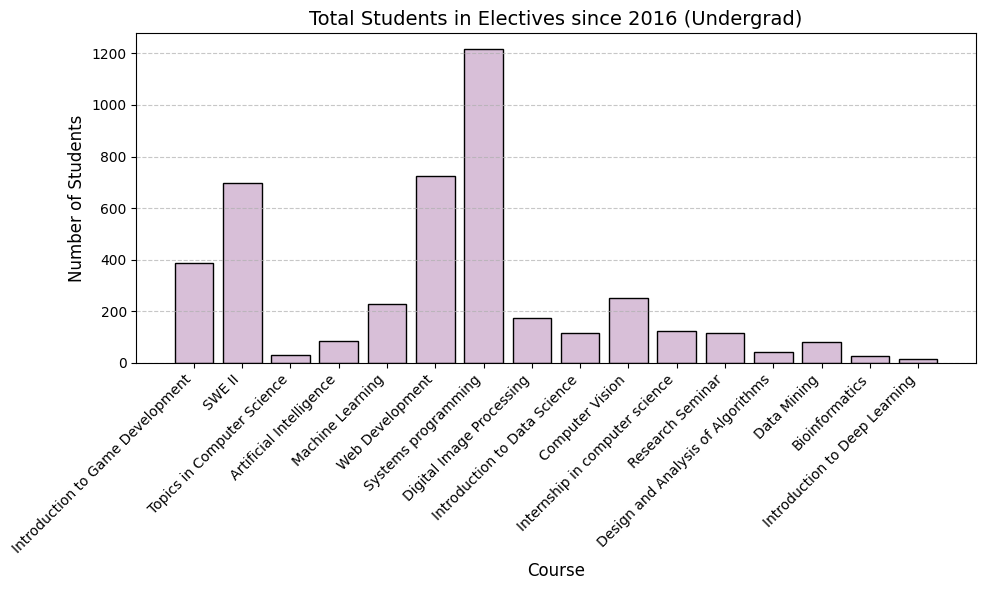

In [ ]:
# Extract course names and counts from the subset dictionary
courses = list(subset_dict_with_names.keys())
counts = list(subset_dict_with_names.values())

# Create a bar plot with custom styling
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(courses, counts, color='thistle', edgecolor='black')  # Set color and edgecolor
plt.xlabel("Course", fontsize=12)  # Add label for x-axis with fontsize
plt.ylabel("Number of Students", fontsize=12)  # Add label for y-axis with fontsize
plt.title("Total Students in Electives since 2016 (Undergrad)", fontsize=14)  # Add title with fontsize
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels and set fontsize
plt.yticks(fontsize=10)  # Set fontsize for y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines with transparency
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


## Creating grades per elective plot
- I wanna focus on just a few courses
  - Electives on x-axis
  - Count on y-axis
  - The bar representing the semester/year

In [ ]:
# load data to dataframe
filepath = '/content/drive/MyDrive/data science project/DataScience_DeleteMAY15/hackr/anonData2.csv' # update the file path to mine
ds = pd.read_csv(filepath, header=0)

In [ ]:
# split term code into year and term
ds['term'] = ds['term'].astype(str)

ds['year'] = ds['term'].str[:-2]
ds['semester'] = ds['term'].str[-2:]
# drop `term` since we split it into year and semester
ds.drop('term', axis=1, inplace=True)


# replace term code with string
# dictionary of term values
term_map = {
    '10': 'fall',
    '20': 'spring',
    '30': 'summer1',
    '40': 'summer2'
}

# Replace term codes with string
ds['semester'] = ds['semester'].replace(term_map)


# ds.head()

In [ ]:
# Combine year and semester into a new column
ds['new_term'] = ds['year'] + ds['semester']

# Drop the individual year and semester columns if needed
# ds.drop(['year', 'semester'], axis=1, inplace=True)


# Display the DataFrame with the new column
ds.head()

,randomId,class,majorCode,subject,course,section,grade,year,semester,new_term
0,500962,MA,NaN,CSCI,6175,02,A,2016,fall,2016fall
1,500962,MA,NaN,CSCI,7300,01,A,2016,fall,2016fall
2,500962,MA,NaN,CSCI,6381,01,A,2016,summer2,2016summer2
3,500962,MA,NaN,CSCI,7300,01,A,2016,summer2,2016summer2
4,505445,MA,NaN,CSCI,6363,01,B,2016,fall,2016fall


In [ ]:
# web dev, swe 2, systems, games dev
# ‘3341’: ‘SWE II’,
# ‘3342’: ‘Web Development’,
# ‘3370’: ‘Introduction to Game Development’,
# ‘3334’: ‘Systems programming’,

# Define the list of courses to count
courses_to_count = [3341, 3342, 3370, 3334]

# Initialize a dictionary to store the counters for each course
course_counters = {}

# Loop through each course and count the occurrences
for course in courses_to_count:
    # Count occurrences of the course in the "course" column
    course_count = ds[ds["course"] == course].shape[0]
    # Store the counter in the dictionary
    course_counters[course] = course_count

# Print the counters for each course
for course, count in course_counters.items():
    print(f"Course {course}, Counter: {count}")

Course 3341, Counter: 699
Course 3342, Counter: 723
Course 3370, Counter: 388
Course 3334, Counter: 1217


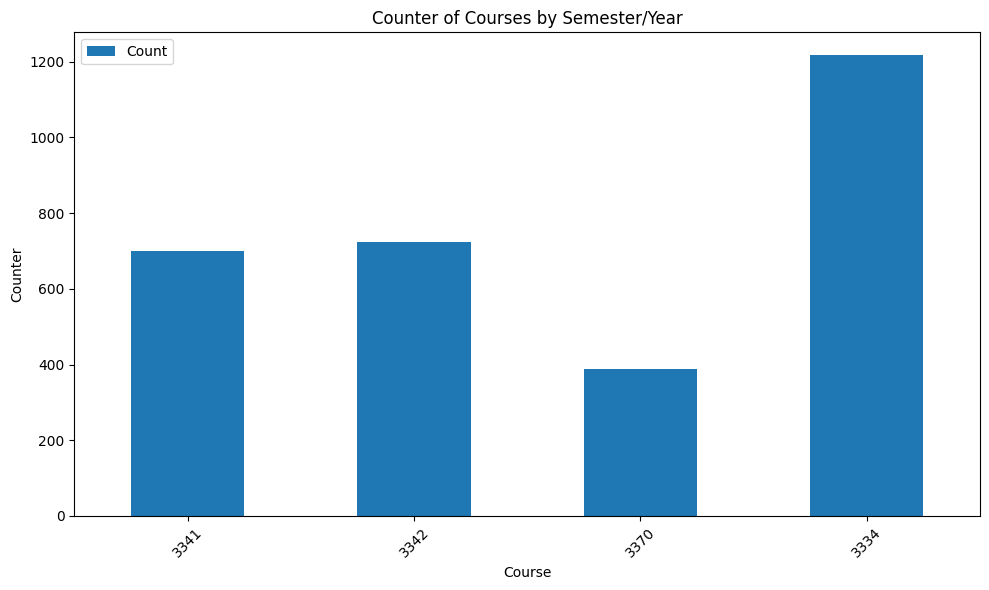

In [ ]:
# Convert course_counters to DataFrame for easier plotting
df_counts = pd.DataFrame.from_dict(course_counters, orient='index', columns=['Count'])

# Plot the stacked bar graph
df_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.xlabel("Course")
plt.ylabel("Counter")
plt.title("Counter of Courses by Semester/Year")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

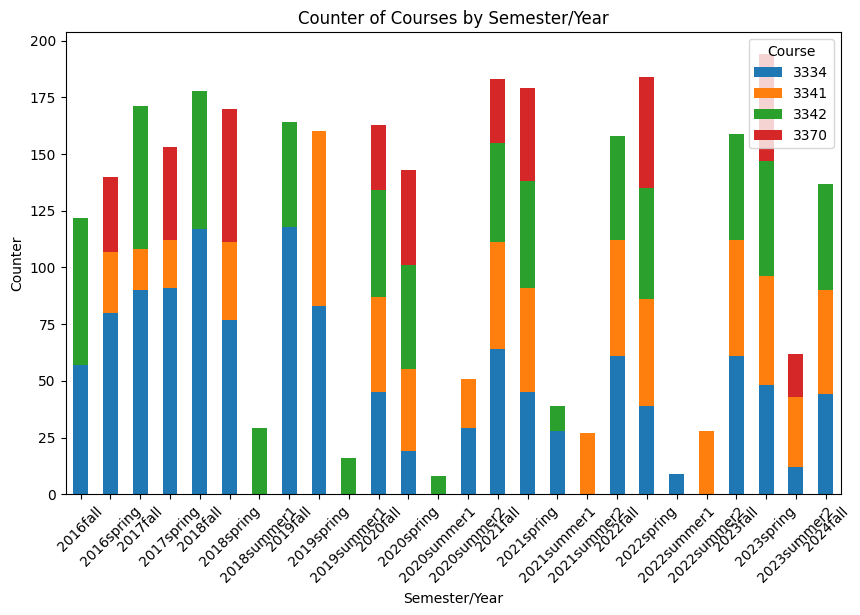

In [ ]:


# Pivot the DataFrame to have courses as columns and new_term as index
pivot_df = ds[ds['course'].isin(courses_to_count)].pivot_table(index='new_term', columns='course', aggfunc='size', fill_value=0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.xlabel("Semester/Year")
plt.ylabel("Counter")
plt.title("Counter of Courses by Semester/Year")
plt.xticks(rotation=45)
plt.legend(title="Course")

# Show the plot
plt.show()


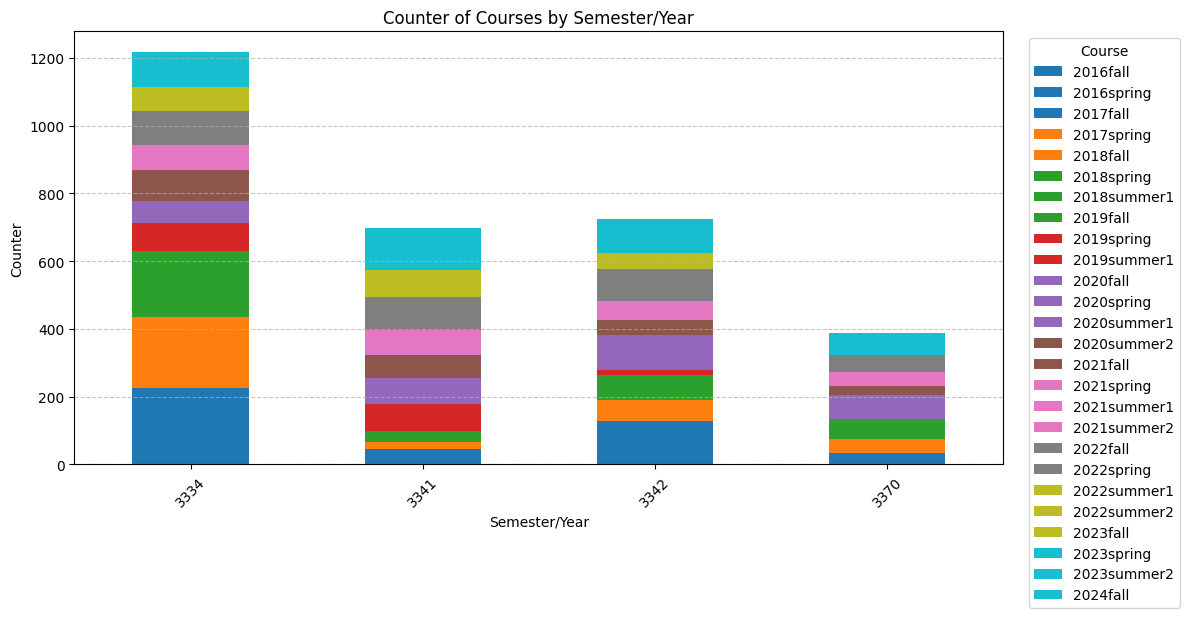

In [ ]:

# Plot the stacked bar graph
pivot_df.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

# Customize the plot
plt.xlabel("Semester/Year")
plt.ylabel("Counter")
plt.title("Counter of Courses by Semester/Year")
plt.xticks(rotation=45)
plt.legend(title="Course", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


See the trend of the most popular paths taken by students who have graduated over the recent years (looking at the electives taken by ID), to help show the best route of classes to take. (line graph)
Courses to be shown on the y-axis
Semester on the x-axis
Each line representing a student (by color)

<ipython-input-73-af2b08ab000c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_filtered['grade'] = ds_filtered['grade'].replace(grade_map).astype(grade_dtype)


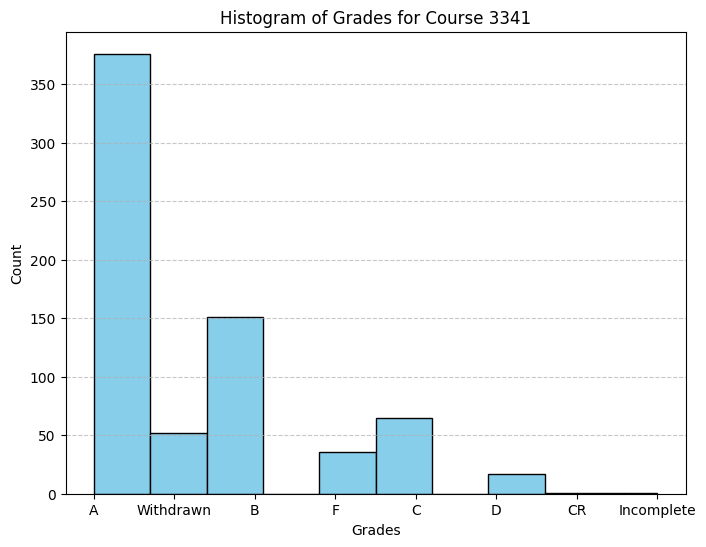

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
ds = pd.read_csv(filepath, header=0)

# Define the list of courses to include
courses_to_include = [3341]

# Filter the DataFrame to include only the specified courses
ds_filtered = ds[ds['course'].isin(courses_to_include)]

# Define a custom categorical data type for grades with the desired order
grade_order = ['A', 'B', 'C', 'D', 'F', 'Incomplete', 'Withdrawn', 'CR']
grade_dtype = pd.CategoricalDtype(categories=grade_order, ordered=True)

# Replace term codes with string in the filtered DataFrame and convert to the custom data type
ds_filtered['grade'] = ds_filtered['grade'].replace(grade_map).astype(grade_dtype)

# Drop 'X'
ds_filtered = ds_filtered[ds_filtered['grade'] != 'X']

# Get the grades for course 3341
grades_3341 = ds_filtered['grade']

# Plot a histogram of grades for course 3341
plt.figure(figsize=(8, 6))
plt.hist(grades_3341, bins=10, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Grades')
plt.ylabel('Count')
plt.title('Histogram of Grades for Course 3341')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


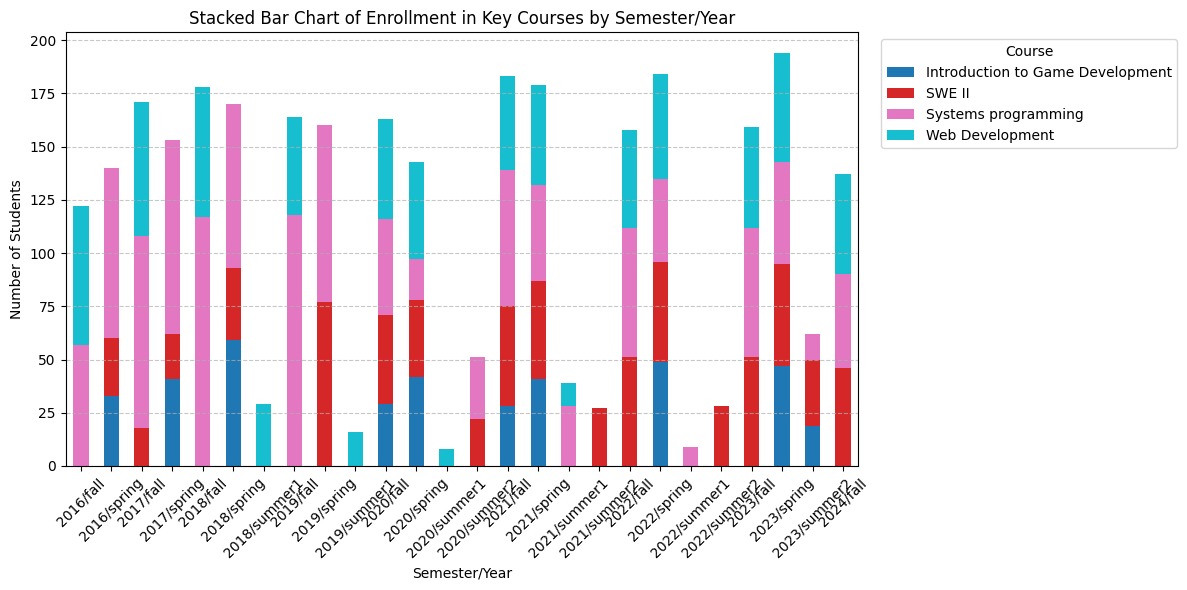

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
ds = pd.read_csv(filepath, header=0)

# Split term code into year and term
ds['term'] = ds['term'].astype(str)
ds['year'] = ds['term'].str[:-2]
ds['semester'] = ds['term'].str[-2:]

# Drop `term` since we split it into year and semester
ds.drop('term', axis=1, inplace=True)

# Replace term codes with string
term_map = {'10': 'fall', '20': 'spring', '30': 'summer1', '40': 'summer2'}
ds['semester'] = ds['semester'].replace(term_map)

# Replace course number with course name for the 4 electives
course_name_map = {
    3300: "Internship in computer science",
    3334: "Systems programming",
    3341: "SWE II",
    3342: "Web Development",
    3343: "Introduction to Data Science",
    3351: "Topics in Computer Science",
    3370: "Introduction to Game Development",
    4185: "Research Seminar",
    4301: "Digital Image Processing",
    4303: "Computer Vision",
    4310: "Design and Analysis of Algorithms",
    4321: "Games and Computation",
    4341: "Topics in Computer Science",
    4343: "Data Mining",
    4344: "Bioinformatics",
    4350: "Artificial Intelligence",
    4352: "Machine Learning",
    4353: "Introduction to Deep Learning"
}

# Replace course codes with course names
ds['course'] = ds['course'].replace(course_name_map)

# Combine year and semester into a new column
ds['new_term'] = ds['year'] + '/' + ds['semester']

# Define the list of course names to count
courses_to_count = ["SWE II", "Web Development", "Introduction to Game Development", "Systems programming"]

# Pivot the DataFrame to have new_term as columns and courses as index
pivot_df = ds[ds['course'].isin(courses_to_count)].pivot_table(index='course', columns='new_term', aggfunc='size', fill_value=0)

# Plot the stacked bar graph
pivot_df.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

# Customize the plot
plt.xlabel("Semester/Year")
plt.ylabel("Number of Students")
plt.title("Stacked Bar Chart of Enrollment in Key Courses by Semester/Year")
plt.xticks(rotation=45)
plt.legend(title="Course", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Filter the DataFrame to include only course 3341
ds_3334 = ds_filtered[ds_filtered['course'] == 3343]

count_A = (ds_3334['grade'] == 'A').sum()
print("Counter of A's for course 3341:", count_A)

count_B = (ds_3334['grade'] == 'B').sum()
print("Counter of B's for course 3341:", count_B)

count_C = (ds_3334['grade'] == 'C').sum()
print("Counter of C's for course 3341:", count_C)

count_D = (ds_3334['grade'] == 'D').sum()
print("Counter of D's for course 3341:", count_D)

count_F = (ds_3334['grade'] == 'F').sum()
print("Counter of F's for course 3341:", count_F)

count_W = (ds_3334['grade'] == 'Withdrawn').sum()
print("Counter of Withdrawn's for course 3341:", count_W)

count_I = (ds_3334['grade'] == 'Incomplete').sum()
print("Counter of I's for course 3341:", count_I)

# Count the occurrences of 'A' grades
count_CR = (ds_3334['grade'] == 'CR').sum()
print("Counter of CR's for course 3341:", count_CR)

Counter of A's for course 3341: 0
Counter of B's for course 3341: 0
Counter of C's for course 3341: 0
Counter of D's for course 3341: 0
Counter of F's for course 3341: 0
Counter of Withdrawn's for course 3341: 0
Counter of I's for course 3341: 0
Counter of CR's for course 3341: 0


<ipython-input-122-bdee2c673cdb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_filtered['grade'] = ds_filtered['grade'].replace(grade_map).astype(grade_dtype)


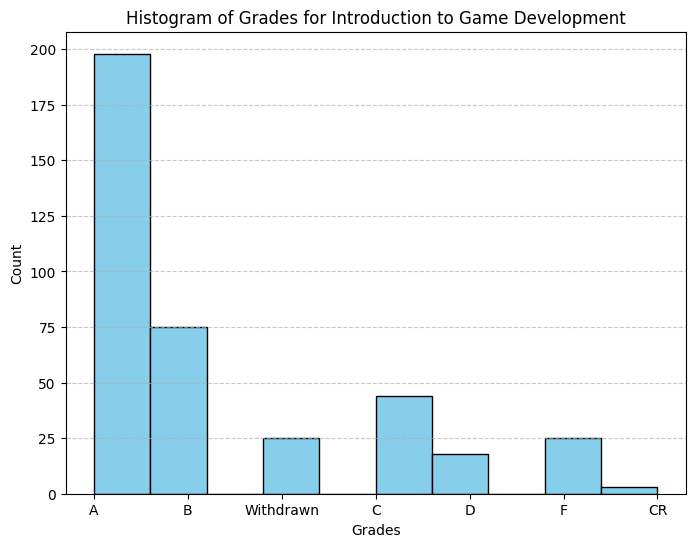

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
ds = pd.read_csv(filepath, header=0)

# Define the list of courses to include
courses_to_include = [3370] # web dev

# Filter the DataFrame to include only the specified courses
ds_filtered = ds[ds['course'].isin(courses_to_include)]

# Define a custom categorical data type for grades with the desired order
grade_order = ['A', 'B', 'C', 'D', 'F', 'Incomplete', 'Withdrawn', 'CR']
grade_dtype = pd.CategoricalDtype(categories=grade_order, ordered=True)

# Replace term codes with string in the filtered DataFrame and convert to the custom data type
ds_filtered['grade'] = ds_filtered['grade'].replace(grade_map).astype(grade_dtype)

# Drop 'X'
ds_filtered = ds_filtered[ds_filtered['grade'] != 'X']

# Get the grades for course 3341
grades_3370 = ds_filtered['grade']

# Plot a histogram of grades for course 3341
plt.figure(figsize=(8, 6))
plt.hist(grades_3370, bins=10, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Grades')
plt.ylabel('Count')
plt.title('Histogram of Grades for Introduction to Game Development')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


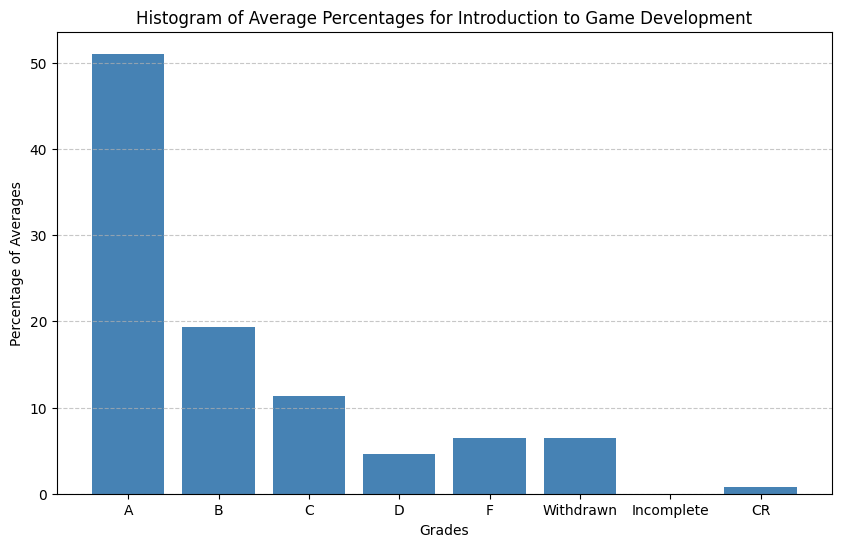

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # Define the list of courses to include
# courses_to_include = [3370]

# # Filter the DataFrame to include only the specified courses
# ds_filtered = ds[ds['course'].isin(courses_to_include)]

# Filter the DataFrame to include only course 3370
ds_3370 = ds_filtered[ds_filtered['course'] == 3370]

# Count occurrences of each grade
count_A = (ds_3370['grade'] == 'A').sum()
count_B = (ds_3370['grade'] == 'B').sum()
count_C = (ds_3370['grade'] == 'C').sum()
count_D = (ds_3370['grade'] == 'D').sum()
count_F = (ds_3370['grade'] == 'F').sum()
count_W = (ds_3370['grade'] == 'Withdrawn').sum()
count_I = (ds_3370['grade'] == 'Incomplete').sum()
count_CR = (ds_3370['grade'] == 'CR').sum()

# Calculate the total count
total_count = ds_3370.shape[0]

# Calculate the average percentage for each grade
avg_percent_A = (count_A / total_count) * 100
avg_percent_B = (count_B / total_count) * 100
avg_percent_C = (count_C / total_count) * 100
avg_percent_D = (count_D / total_count) * 100
avg_percent_F = (count_F / total_count) * 100
avg_percent_W = (count_W / total_count) * 100
avg_percent_I = (count_I / total_count) * 100
avg_percent_CR = (count_CR / total_count) * 100

# Create a dictionary to store the average percentages
avg_percentages = {
    'A': avg_percent_A,
    'B': avg_percent_B,
    'C': avg_percent_C,
    'D': avg_percent_D,
    'F': avg_percent_F,
    'Withdrawn': avg_percent_W,
    'Incomplete': avg_percent_I,
    'CR': avg_percent_CR
}

# Plot a histogram of the average percentages
plt.figure(figsize=(10, 6))
plt.bar(avg_percentages.keys(), avg_percentages.values(), color='steelblue')
plt.xlabel('Grades')
plt.ylabel('Percentage of Averages')
plt.title('Histogram of Average Percentages for Introduction to Game Development')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
